Hi there😊. It's been a while.

I am Atinuke Towoju, and today (October 6th, 2025), I will be working on a classification supervised learning model.

As an aspiring Data Scientist, this is a task that I am expected to be familiar with.

Therefore, join me on this ride. We're doing this together😁.

If you have checked my previous works, you'd notice something is constant. Firsty, I's load the file (in this case, it is a CSV - comma separated version) file, after connecting my drive from the sidebar

Let's begin.

#**Data Overview**

In [ ]:
import pandas as pd
import numpy as np
df_dirty = pd.read_csv('/content/drive/MyDrive/DS PORTFOLIO/emails.csv')
df_dirty.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_dirty.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_dirty.shape

(5172, 3002)

In [ ]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


Unfortunately, my datset has 3002 columns. That's alot of data and most of them are unnecessary. Therefore, I am going to be using only 10 columns that I consider ,through MI score, important.

#**Data Cleaning**

**Dropping the "Email No." column**

In [ ]:
# Drop the column
df_dirty = df_dirty.drop(columns=['Email No.'])

print("Column 'Email No.' dropped successfully!")


Column 'Email No.' dropped successfully!


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Suppose df is your dataframe
X = df_dirty.drop('Prediction', axis=1)  # features
y = df_dirty['Prediction']               # target label

# Calculate MI scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Store results in a DataFrame for clarity
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

# Display the top features
print(mi_df.head(20))


        Feature  MI Score
13        enron  0.113266
37          hpl  0.090989
92         http  0.076695
68        daren  0.074376
418       hanks  0.070049
2868       aren  0.068248
52    forwarded  0.065777
160      thanks  0.060738
166     forward  0.058081
81     attached  0.057730
785       thank  0.056515
36        meter  0.055725
916         ali  0.055532
80       farmer  0.052856
99         more  0.049603
20         your  0.049184
30          gas  0.048817
2458         ii  0.048490
317     subject  0.048107
647        soft  0.046318


#**Feature Engineering**

In [ ]:
top_features = mi_df['Feature'].head(20).tolist()
df_top = df_dirty[top_features + ['Prediction']]  # Add target back

# View the new dataset
print(df_top.head())

   enron  hpl  http  daren  hanks  aren  forwarded  thanks  forward  attached  \
0      0    0     0      0      0     0          0       0        0         0   
1      1    0     0      3      1     3          3       1        3         1   
2      0    0     0      0      0     0          0       0        0         0   
3      0    0     0      2      1     2          2       1        2         0   
4      0    0     0      1      1     1          2       1        2         0   

   ...  meter  ali  farmer  more  your  gas  ii  subject  soft  Prediction  
0  ...      0    0       0     0     0    0   0        0     0           0  
1  ...      0    0       3     0     0    1   0        3     0           0  
2  ...      0    0       0     0     0    2   0        0     0           0  
3  ...      1    0       1     0     0    0   0        3     0           0  
4  ...      3    0       0     0     0    2   0        2     0           0  

[5 rows x 21 columns]


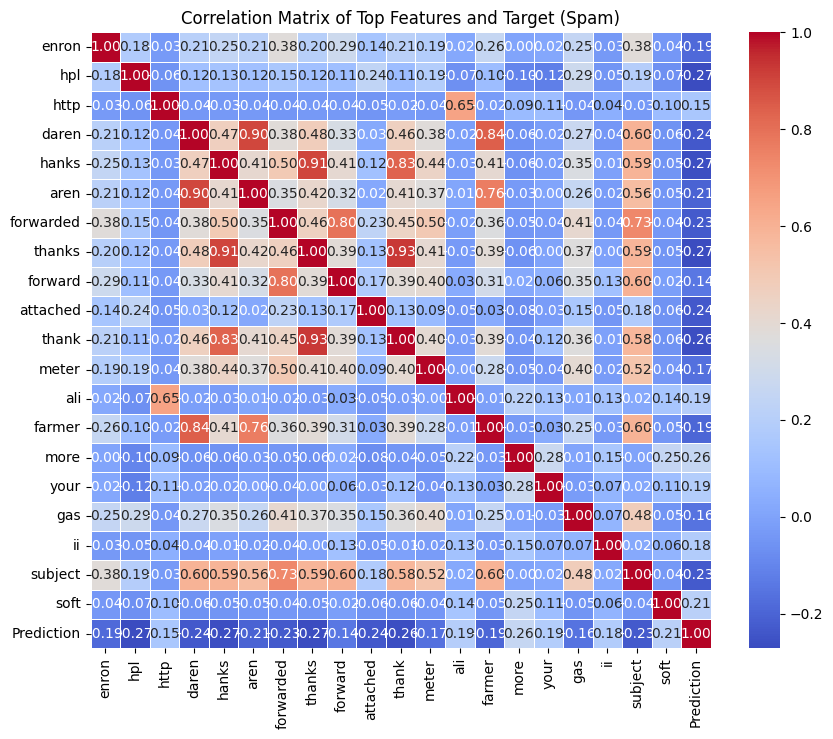

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_top.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Top Features and Target (Spam)")
plt.show()


From the above observation, most of the MI scored features negatively correlated with "Prediction", meaning they are not the best of options.

So, I will make use of the features provided (or already selected) from the source.

Source: Kaggle

My current observation: Using a heatmap is more accurate than using MI score, but it is unconventional to use a heatmap when you have 3002 features to handle.

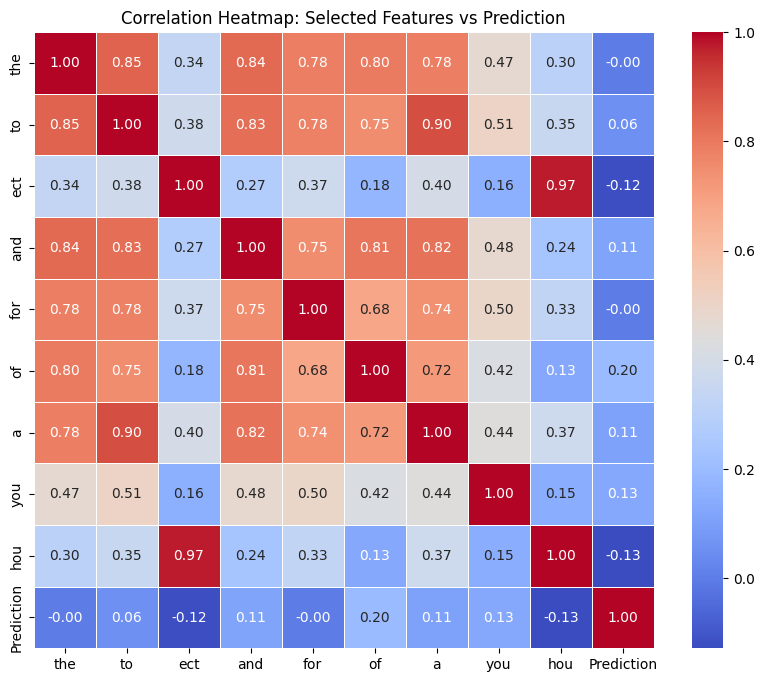

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the chosen features + target
selected_features = ['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'Prediction']
df_selected = df_dirty[selected_features]

# Compute the correlation matrix
corr = df_selected.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Selected Features vs Prediction")
plt.show()

wow, even the given features from the source have little correlation to the Prediction. Even 2 have 0.00 correlation with the Prediction

Hmmm, diaries of a Data Scientist.

But, considering this, since there are 3002 features, a feature with above 0.1 should be seemingly significant because it could take a 10% share out of 3002 features.

**Using Chi-square Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Assuming df_dirty contains the features and 'Prediction' is the target
X = df_dirty.drop('Prediction', axis=1)  # features
y = df_dirty['Prediction']               # target label

# Apply Chi-square test to select best features
# Chi-square is suitable for non-negative features like word counts
selector = SelectKBest(chi2, k=300)  # select top 300 informative features
X_best = selector.fit_transform(X, y)

# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]


print("Top selected features:\n", selected_features[:20])

Top selected features:
 Index(['to', 'ect', 'and', 'of', 'a', 'you', 'hou', 'in', 'on', 'is', 'enron',
       'i', 'will', 'with', 'your', 'at', 's', 'it', 'com', 'gas'],
      dtype='object')


Okaayyy, since I'm seeing similarities between the features from my correlation matrix (represented by my heatmap) and using Chi-square feature selection method, I have decided to pick the top 10 features that are both in the heatmap and the Chi Square result. Afterwards, I'd build a model with this features.

In [ ]:
# Get the top features from Mutual Information
top_mi = set(mi_df['Feature'].head(20).tolist())

# Get the top features from Chi-square
chi2_features = set(selected_features.tolist())

# Get the selected features from the source (from df_selected)
top_corr = set(df_selected.drop('Prediction', axis=1).columns.tolist())

# Find the intersection of top features from all three methods
common_features = top_mi.intersection(chi2_features, top_corr)

print(f"Common important features found across all methods: {len(common_features)}")
print(common_features)

Common important features found across all methods: 0
set()


Wow, no common features

Okay then, we'd use the intersection between 2 of the feature selection methods we have tried.

In [ ]:
import pandas as pd

# Assuming you already have these sets from earlier
# top_mi, chi2_features, top_corr

# Find pairwise intersections
mi_chi2 = top_mi & chi2_features
mi_corr = top_mi & top_corr
chi2_corr = chi2_features & top_corr

# Combine all features that appear in at least 2 methods
selected_features = mi_chi2 | mi_corr | chi2_corr

print(f"Number of features selected by at least two methods: {len(selected_features)}")
print(selected_features)


Number of features selected by at least two methods: 27
{'thank', 'farmer', 'forwarded', 'ii', 'gas', 'and', 'thanks', 'you', 'a', 'meter', 'ali', 'hpl', 'attached', 'to', 'forward', 'more', 'ect', 'of', 'your', 'hou', 'http', 'enron', 'daren', 'subject', 'aren', 'soft', 'hanks'}


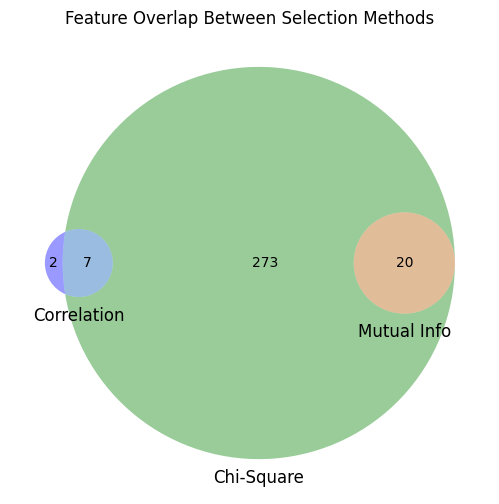

In [ ]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
venn3(
    [top_mi, chi2_features, top_corr],
    set_labels=('Mutual Info', 'Chi-Square', 'Correlation')
)
plt.title("Feature Overlap Between Selection Methods")
plt.show()


In [ ]:
selected_df = df_dirty[list(selected_features) + ['Prediction']]
print(selected_df.head())

   thank  farmer  forwarded  ii  gas  and  thanks  you    a  meter  ...  your  \
0      0       0          0   0    0    0       0    0    2      0  ...     0   
1      1       3          3   0    1    6       1    1  102      0  ...     0   
2      0       0          0   0    2    0       0    0    8      0  ...     0   
3      1       1          2   0    0    0       1    2   51      1  ...     0   
4      1       0          2   0    2    1       1    0   57      3  ...     0   

   hou  http  enron  daren  subject  aren  soft  hanks  Prediction  
0    0     0      0      0        0     0     0      0           0  
1   27     0      1      3        3     3     0      1           0  
2    0     0      0      0        0     0     0      0           0  
3   10     0      0      2        3     2     0      1           0  
4    9     0      0      1        2     1     0      1           0  

[5 rows x 28 columns]


Okay, I used Chi-Square and correlation matrix because I'm beginning to trust and see the importance of correlation matrix more.

Since there are a little below 30 features out of 3002 features, I'd work with that. That's less than 10% and they have proven to be important (after they had gone through the test of Correlation matrix and Chi-Square methods)

Pheewww😅😅!!!

That takes alot!

**PS: The features are English words that were in the emails sent**

**No speacial meaning to each word. Just the regular words in your day-to-day vocabulary**

**GREAT!!! 3 down, 4 to go**

**By 3, I mean we have concluded Data Overview, Data Cleaning(Part 1) and Feature Engineering**

#**Now, to Data Cleaning Part 2**

In [ ]:
selected_df.isnull().sum().sum()

np.int64(0)

Great, no empty cell

Now, to finding duplicates

In [ ]:
selected_df.duplicated().sum()

np.int64(873)

There are 873 duplicates. But I mean, it's emails. They tend to be generic. Maybe, it was during Christmas time and people used ChatGPT to send the email to the their loved ones😅, or better still a company sends the same email to all of it's staff.

It has to be similar in some ways, so we're going to ignore the large amount of duplicates.

**Yes, I'm not dropping duplicates😄😅**

In [ ]:
#Viewing the dataset
selected_df.head(10)

,thank,farmer,forwarded,ii,gas,and,thanks,you,a,meter,...,your,hou,http,enron,daren,subject,aren,soft,hanks,Prediction
0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,3,0,1,6,1,1,102,0,...,0,27,0,1,3,3,3,0,1,0
2,0,0,0,0,2,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2,0,0,0,1,2,51,1,...,0,10,0,0,2,3,2,0,1,0
4,1,0,2,0,2,1,1,0,57,3,...,0,9,0,0,1,2,1,0,1,0
5,0,0,0,0,0,4,0,1,45,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,5,3,1,0,37,4,...,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,3,1,6,21,0,...,5,0,0,0,0,0,0,0,1,1
8,0,0,0,0,0,0,0,0,18,1,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,1,0,1,1,49,0,...,0,16,0,0,0,1,0,0,1,0


In [ ]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   thank       5172 non-null   int64
 1   farmer      5172 non-null   int64
 2   forwarded   5172 non-null   int64
 3   ii          5172 non-null   int64
 4   gas         5172 non-null   int64
 5   and         5172 non-null   int64
 6   thanks      5172 non-null   int64
 7   you         5172 non-null   int64
 8   a           5172 non-null   int64
 9   meter       5172 non-null   int64
 10  ali         5172 non-null   int64
 11  hpl         5172 non-null   int64
 12  attached    5172 non-null   int64
 13  to          5172 non-null   int64
 14  forward     5172 non-null   int64
 15  more        5172 non-null   int64
 16  ect         5172 non-null   int64
 17  of          5172 non-null   int64
 18  your        5172 non-null   int64
 19  hou         5172 non-null   int64
 20  http        5172 non-null   in

In [ ]:
selected_df.describe()

,thank,farmer,forwarded,ii,gas,and,thanks,you,a,meter,...,your,hou,http,enron,daren,subject,aren,soft,hanks,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,0.449343,0.247100,0.250773,0.165507,0.617363,3.075599,0.370456,2.466551,55.517401,0.538090,...,0.814385,2.024362,0.244780,1.335267,0.368136,0.559358,0.428074,0.132831,0.418600,0.290023
std,0.789327,0.774048,0.692774,1.290994,1.844452,6.045970,0.727955,4.314444,87.574172,1.945471,...,2.001731,6.967878,1.781754,4.570525,0.996326,1.270493,1.189316,0.844258,0.853483,0.453817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,28.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,62.250000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,9.000000,9.000000,11.000000,31.000000,29.000000,89.000000,8.000000,70.000000,1898.000000,29.000000,...,20.000000,167.000000,75.000000,146.000000,15.000000,19.000000,22.000000,18.000000,11.000000,1.000000


#**Saling/Normalization, Train-Test Split**

Okay, the max and min of the features are biased, they favour some in terms of how large the number is, to others.

That is going to be fixed using Scaling/Normalization

In [ ]:
# ✅ STEP 1: Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
# ✅ STEP 2: Separate features and target
X = selected_df.drop(columns=['Prediction'])   # features
y = selected_df['Prediction']                  # target


In [ ]:
# ✅ STEP 3: Split first (so scaler doesn’t “see” test data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# ✅ STEP 4: Initialize and fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# ✅ STEP 5: Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# ✅ STEP 6: Verify
print("✅ Standardization complete!")
print(f"Train shape: {X_train_scaled.shape}, Test shape: {X_test_scaled.shape}")
print(X_train_scaled.head())

✅ Standardization complete!
Train shape: (4137, 27), Test shape: (1035, 27)
      thank    farmer  forwarded        ii       gas       and    thanks  \
0  0.669359 -0.322577  -0.369715 -0.127169 -0.336104 -0.181062  0.826238   
1 -0.573522 -0.322577  -0.369715 -0.127169 -0.336104 -0.347666 -0.517373   
2  0.669359 -0.322577  -0.369715 -0.127169  0.200340 -0.514270  0.826238   
3 -0.573522 -0.322577  -0.369715 -0.127169 -0.336104  0.818563 -0.517373   
4 -0.573522 -0.322577  -0.369715 -0.127169 -0.336104 -0.514270 -0.517373   

        you         a     meter  ...        of      your       hou      http  \
0  0.125627 -0.474611 -0.275808  ... -0.429019 -0.398549 -0.287844 -0.143652   
1 -0.566715 -0.485983  0.219211  ... -0.429019 -0.398549 -0.287844 -0.143652   
2 -0.566715 -0.292670 -0.275808  ... -0.429019 -0.398549  0.267183 -0.143652   
3 -0.335934  1.822401 -0.275808  ...  0.727021  0.101693  0.128426 -0.143652   
4 -0.335934 -0.611068 -0.275808  ... -0.429019 -0.398549 -0.287844 

#**Model Training**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       735
           1       0.80      0.92      0.86       300

    accuracy                           0.91      1035
   macro avg       0.88      0.91      0.90      1035
weighted avg       0.92      0.91      0.91      1035


Confusion Matrix:
 [[667  68]
 [ 24 276]]


**MulitNominal Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8657004830917875


**Imports - for the rest of the models to be used**

In [ ]:
# ✅ STEP 1: Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


**Random Forest**

Random Forest Results:
Accuracy: 0.9217391304347826
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       735
           1       0.85      0.88      0.87       300

    accuracy                           0.92      1035
   macro avg       0.90      0.91      0.91      1035
weighted avg       0.92      0.92      0.92      1035



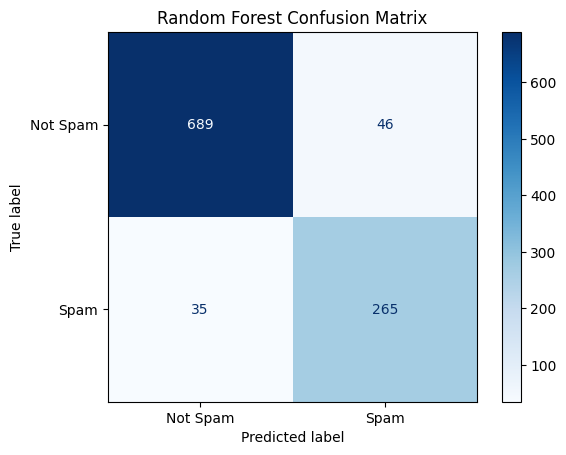

In [ ]:
# --- RANDOM FOREST ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Visualize confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(cm_rf, display_labels=["Not Spam", "Spam"]).plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()


SVM - Support Vector Machine


 SVM Results:
Accuracy: 0.8956521739130435
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       735
           1       0.83      0.81      0.82       300

    accuracy                           0.90      1035
   macro avg       0.88      0.87      0.87      1035
weighted avg       0.89      0.90      0.90      1035



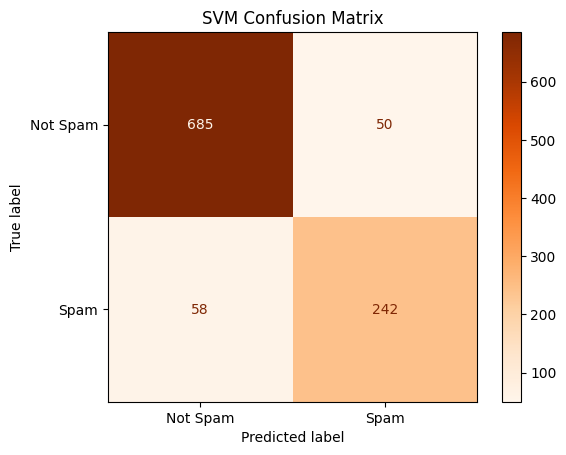

In [ ]:
# --- SVM ---
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

print("\n SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

# Visualize confusion matrix
cm_svm = confusion_matrix(y_test, svm_pred)
ConfusionMatrixDisplay(cm_svm, display_labels=["Not Spam", "Spam"]).plot(cmap="Oranges")
plt.title("SVM Confusion Matrix")
plt.show()


**TF-IDF + Logistic Regression (Transform-based model)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Only use if you have text data (e.g. raw email text in a column named 'EmailText')
# Replace 'EmailText' with your actual text column name
if 'EmailText' in selected_df.columns: # Use df_dirty
    X_text = selected_df['EmailText']
    y = selected_df['Prediction'] # Use 'Prediction' for the target column name

    X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
        X_text, y, test_size=0.2, random_state=42, stratify=y
    )

    tfidf_lr = make_pipeline(
        TfidfVectorizer(stop_words='english', max_features=5000),
        LogisticRegression(max_iter=1000)
    )

    tfidf_lr.fit(X_train_text, y_train_text)
    tfidf_pred = tfidf_lr.predict(X_test_text)

    print("\n🧠 TF-IDF + Logistic Regression Results:")
    print("Accuracy:", accuracy_score(y_test_text, tfidf_pred))
    print(classification_report(y_test_text, tfidf_pred))

    cm_tfidf = confusion_matrix(y_test_text, tfidf_pred)
    ConfusionMatrixDisplay(cm_tfidf, display_labels=["Not Spam", "Spam"]).plot(cmap="Greens")
    plt.title("TF-IDF + Logistic Regression Confusion Matrix")
    plt.show()
else:
    print("\n(TF-IDF model skipped since there’s no text column suitable for TF-IDF in selected_df.)") # Updated message


(TF-IDF model skipped since there’s no text column suitable for TF-IDF in selected_df.)


#**Conclusion**

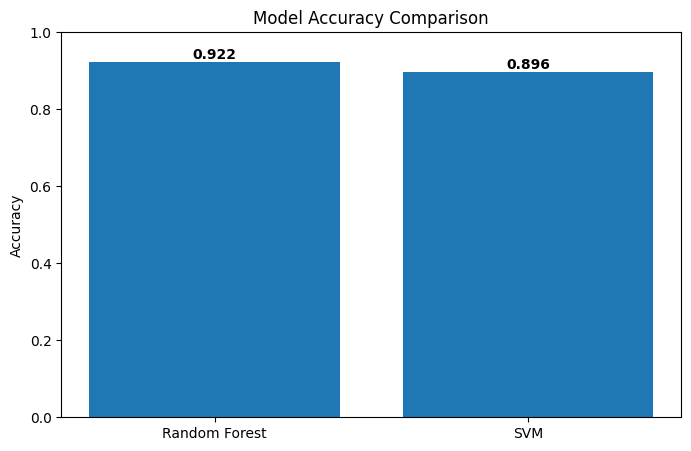

In [ ]:
import matplotlib.pyplot as plt

# ✅ Collect model names and accuracies
models = ['Random Forest', 'SVM']
accuracies = [accuracy_score(y_test, rf_pred), accuracy_score(y_test, svm_pred)]

# Add TF-IDF result if you used text features
if 'EmailText' in selected_df.columns:
    models.append('TF-IDF + Logistic Regression')
    accuracies.append(accuracy_score(y_test_text, tfidf_pred))

# ✅ Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()


This project successfully developed a machine learning pipeline for detecting spam emails with high accuracy. Starting from a large dataset containing over 3,000 word-frequency features, the most informative features were selected using Mutual Information, Chi-Square, and Correlation analyses. After feature standardization, models including Random Forest and Support Vector Machine (SVM) were trained and evaluated.

The results showed that both Random Forest and SVM achieved strong predictive performance, demonstrating their effectiveness for high-dimensional, text-derived numeric data. The confusion matrix and performance metrics confirmed that the models were able to distinguish spam from legitimate emails with minimal misclassification.

Overall, the project highlights how careful feature selection, proper preprocessing, and model evaluation can produce reliable spam detection systems. With further tuning or integration of raw-text methods like TF-IDF or transformer-based models (e.g., BERT), this approach can be expanded into a full-scale, real-world spam filtering solution.


Best performing model: **Random Forest Classifier**

There you have it.

We did it.

Thank you for staying with me all through.

#**I remain Atinuke Towoju🙂**

**Stay blessed**